Hotel Reservation Data Analysis project

Objective
Project Goal: The aim of this project is to gain insights into the factors that affect hotel bookings and cancellations, and to identify patterns in customer behavior that could help the hotel optimize its operations and improve customer satisfaction.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px

# Data Loading & Preprocessing

In [3]:
df = pd.read_csv('H:\Dataset\Hotel Reservations.csv\Hotel Reservations.csv')

df['arrival_year'] = df['arrival_year'].astype(str)

df['arrival_month'] = df['arrival_month'].astype(str).str.zfill(2)

df['arrival_date'] = df['arrival_date'].astype(str).str.zfill(2)

df['arrival'] = df['arrival_year'] + '-' + df['arrival_month'] + '-' + df['arrival_date']

df['arrival'] = pd.to_datetime(df['arrival'], format='%Y-%m-%d', errors='coerce')

df['booking_counts']=df['Booking_ID'].value_counts()

<>:1: SyntaxWarning:

invalid escape sequence '\D'

<>:1: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\harsh\AppData\Local\Temp\ipykernel_36320\2035088395.py:1: SyntaxWarning:

invalid escape sequence '\D'



In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival,booking_counts
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,02,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,NaN
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,06,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,NaN
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,NaN
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,Online,0,0,0,100.00,0,Canceled,2018-05-20,NaN
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,Online,0,0,0,94.50,0,Canceled,2018-04-11,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  object        
 10

In [5]:
df.isnull().sum()

Booking_ID                                  0
no_of_adults                                0
no_of_children                              0
no_of_weekend_nights                        0
no_of_week_nights                           0
type_of_meal_plan                           0
required_car_parking_space                  0
room_type_reserved                          0
lead_time                                   0
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                         0
repeated_guest                              0
no_of_previous_cancellations                0
no_of_previous_bookings_not_canceled        0
avg_price_per_room                          0
no_of_special_requests                      0
booking_status                              0
arrival                                    37
booking_counts                          36275
dtype: int64

there is 37 nan values in the arrival field

In [6]:
df['arrival']

0       2017-10-02
1       2018-11-06
2       2018-02-28
3       2018-05-20
4       2018-04-11
           ...    
36270   2018-08-03
36271   2018-10-17
36272   2018-07-01
36273   2018-04-21
36274   2018-12-30
Name: arrival, Length: 36275, dtype: datetime64[ns]

In [7]:
df.shape

(36275, 21)

# EDA

Lets find the overall booking status distribution

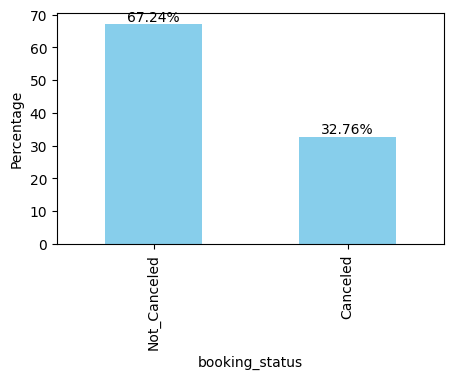

In [6]:
value_counts = df['booking_status'].value_counts(normalize=True) * 100

# Create a bar plot
ax = value_counts.plot(kind='bar',
                       figsize=(5, 3),
                       color='skyblue',
                       ylabel='Percentage')

# Add labels to the bars
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f%%', label_type='edge', color='black')

# Show the plot
plt.show()

In [7]:
booking_status_counts = df['booking_status'].value_counts()

print('Booking Status Counts:')
print(booking_status_counts)


Booking Status Counts:
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


We can see that the number of reservations not canceled is 24,390, while the number of reservations canceled is 11,885. This indicates a significant number of cancellations.

Now let's find the how many adults and children are typically included in a reservation

In [8]:
Total_adults = df['no_of_adults'].sum()

Total_children = df['no_of_children'].sum()

print("Total number of adults:", Total_adults)
print("Total number of children:", Total_children)


Total number of adults: 66926
Total number of children: 3819


There are 66,929 adults and 3,816 children included in the hotel reservations.

# What are the most popular room types and meal plans among customers?

Now let's find out which meal plan type is the most popular among customers.

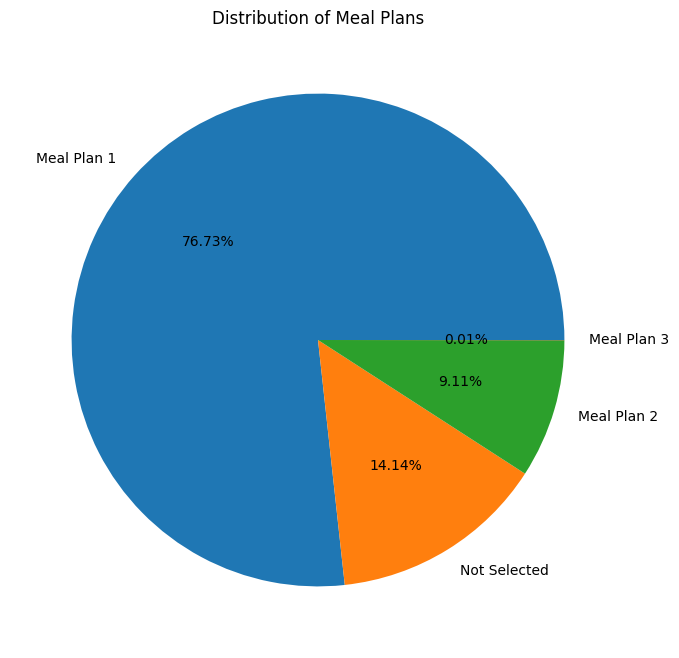

In [9]:

meal = df['type_of_meal_plan'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(8, 8))

plt.title('Distribution of Meal Plans')

meal.set_ylabel('')

plt.show()


we can see that most popular meal plan 1 and meal plan 2 among the customers.

C:\Users\harsh\AppData\Local\Temp\ipykernel_36320\4243270889.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




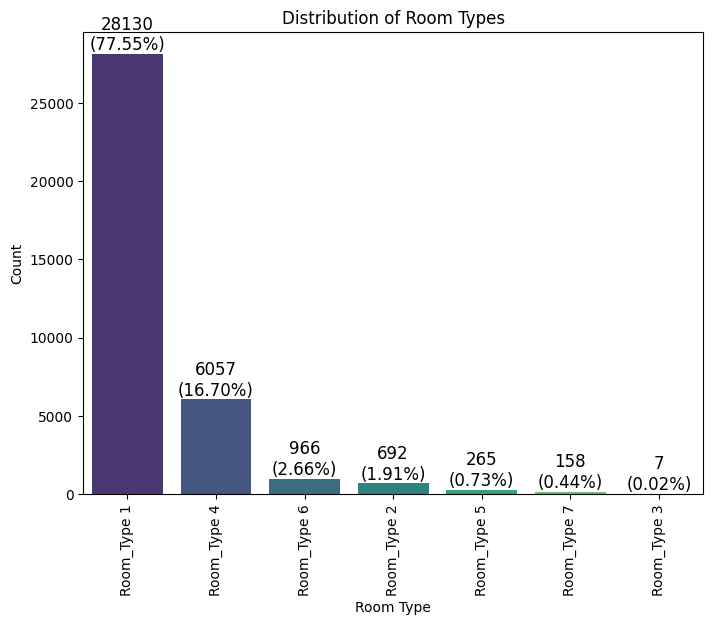

In [13]:
room_counts = df['room_type_reserved'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=room_counts.index, y=room_counts, palette='viridis')

# Annotate each bar with count and percentage information
for room_type, count in zip(room_counts.index, room_counts):
    percentage = count / room_counts.sum() * 100
    ax.text(room_type, count, f'{count}\n({percentage:.2f}%)',
            ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Room Types')
plt.xticks(rotation=90)
plt.xlabel('Room Type')
plt.ylabel('Count')

plt.show()

we can see the mostpopular room types are room_type 1 and room_type 4 and most popular meal plans are meal paln 1 and meal plan 2.


lets check most popular room types monthwies

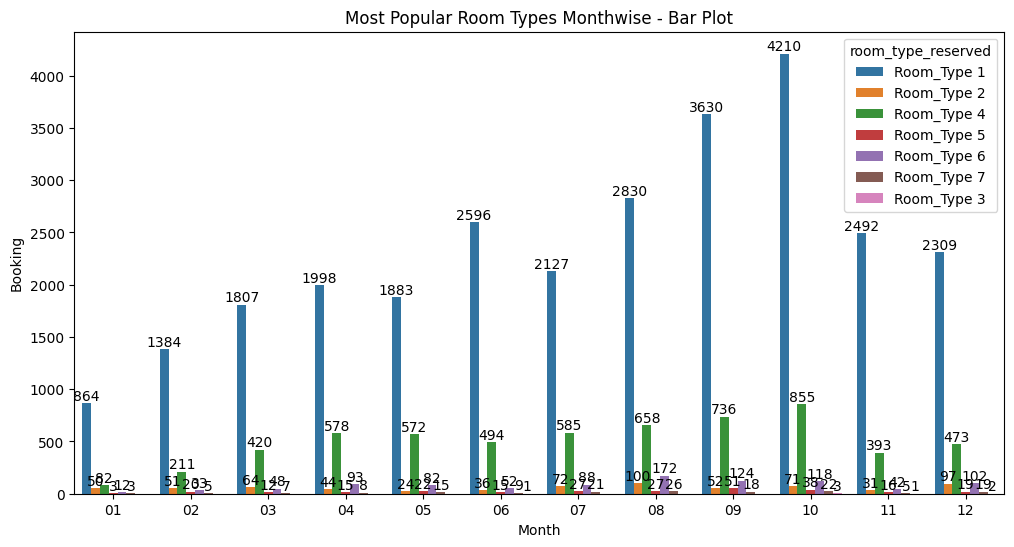

In [17]:


# Assuming 'room_month' is your DataFrame with appropriate data

# Bar Plot
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=room_month, x='arrival_month', y='Booking_ID', hue='room_type_reserved')
ax1.set_xlabel('Month')
ax1.set_ylabel('Booking')
ax1.set_title('Most Popular Room Types Monthwise - Bar Plot')
for bars in ax1.containers:
    ax1.bar_label(bars)
plt.show()



Although there are seven room types in this data, the bar chart shows that Room Type 1 is the most popular room type every month, with the highest number of booking or arrivals in October (4,210). Room Type 4 is the second most popular room type every month, with the highest number of bookings in December (855).

In [20]:
unpopular=room_month.sort_values('Booking_ID')
unpopular = unpopular[~unpopular['room_type_reserved'].isin(['Room_Type 1', 'Room_Type 4'])]
unpopular=unpopular.reset_index()
unpopular

,index,arrival_month,room_type_reserved,Booking_ID
0,32,06,Room_Type 3,1
1,64,11,Room_Type 3,1
2,71,12,Room_Type 3,2
3,57,10,Room_Type 3,3
4,3,01,Room_Type 5,3
5,5,01,Room_Type 7,3
6,68,11,Room_Type 7,5
7,11,02,Room_Type 7,5
8,17,03,Room_Type 7,7
9,23,04,Room_Type 7,8


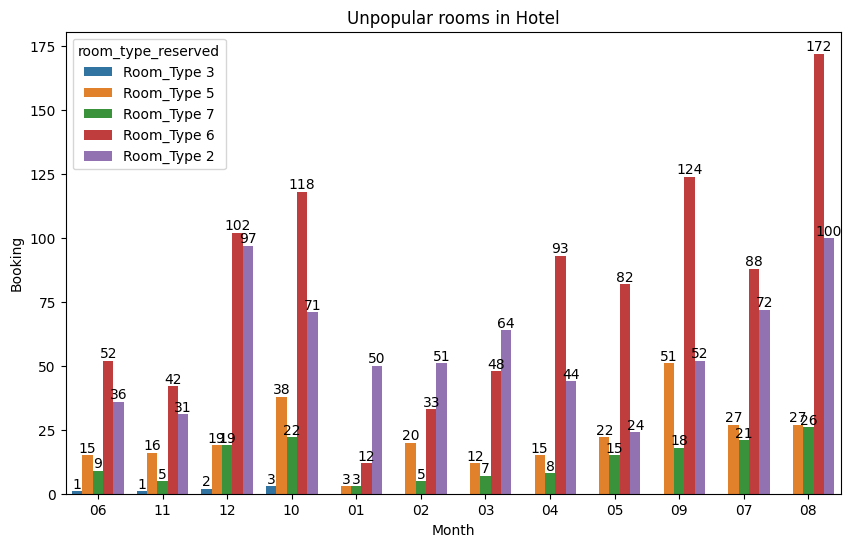

In [21]:

plt.figure(figsize=(10, 6))  
ax = sns.barplot(data=unpopular, x='arrival_month', y='Booking_ID', hue='room_type_reserved')
plt.xlabel('Month')
plt.ylabel('Booking')
plt.title('Unpopular rooms in Hotel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

The bar chart shows that Room Type 3 is the least popular room type, with only 1 booking in June, 3 bookings in October, 1 booking in November, and 2 bookings in December.
 

# How does the lead time (number of days between booking and arrival) affect the likelihood of cancellation?


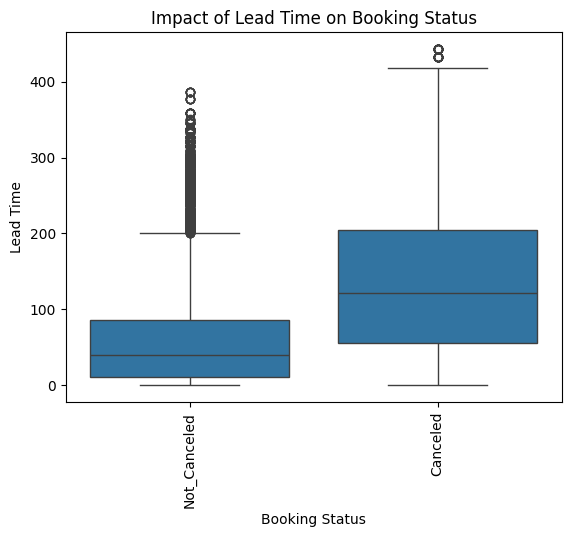

In [22]:
sns.boxplot(data=df, x='booking_status', y='lead_time')

plt.xlabel('Booking Status')
plt.ylabel('Lead Time')

plt.xticks(rotation=90)

plt.title('Impact of Lead Time on Booking Status')

plt.show()

In [24]:
fig=px.box(df,x='booking_status',y='lead_time',
           title='Lead Time impact on Booking status')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

The figure above indicates that there is an impact of lead time on booking status. The data shows that as lead time increases, the cancellation rate also tends to increase. Now, let's calculate the cancellation rate for lead times less than 2 days. Additionally, we can also analyze the impact of lead times equal to or greater than 100 on the cancellation rate.

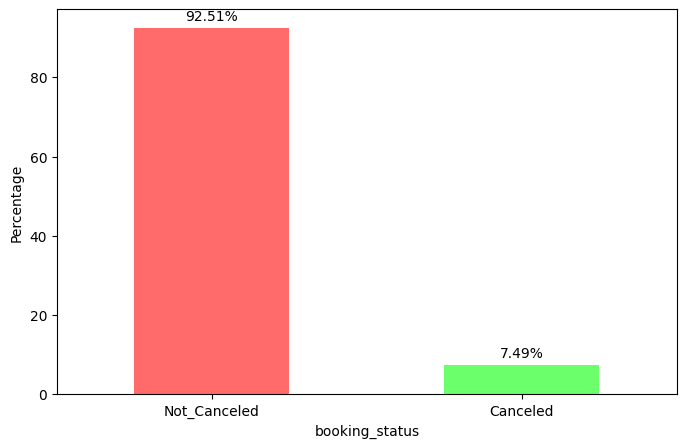

In [26]:
under_2_lead = df[df['lead_time'] < 2]

percentage_counts = (under_2_lead['booking_status']
                     .value_counts(normalize=True) * 100)

ax = percentage_counts.plot(kind='bar', figsize=(8, 5), color=['#FF6B6B','#6BFF6B'], ylabel='Percentage')

for index, value in enumerate(percentage_counts):
    ax.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.show()

The figure indicates that if the customer books the hotel two days before their desired date, the chances of cancellation rate are only 7.5%, suggesting a low probability of cancellation.

If a customer books a hotel one month in advance, how much does it impact the cancellation rate?"

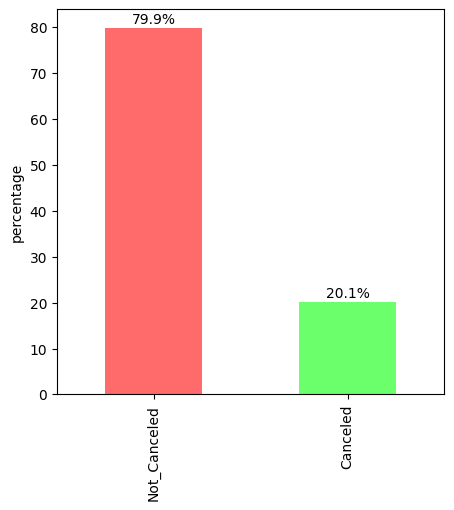

In [20]:
equal_to_30 = df['lead_time'] == 30
color = ['#FF6B6B', '#6BFF6B']
counts = df.loc[equal_to_30, 'booking_status'].value_counts(normalize=True) * 100

ax = counts.plot(kind='bar',figsize=(5,5), ylabel='percentage', color=color)
for i, v in enumerate(counts):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()

If a customer books a hotel one month (30 days) in advance, the chances of cancellation rate increase compared to booking a hotel just 2 days before the desired date.

Let's identify the impact on the cancellation rate when a customer books a hotel 100 days in advance before their arrival.

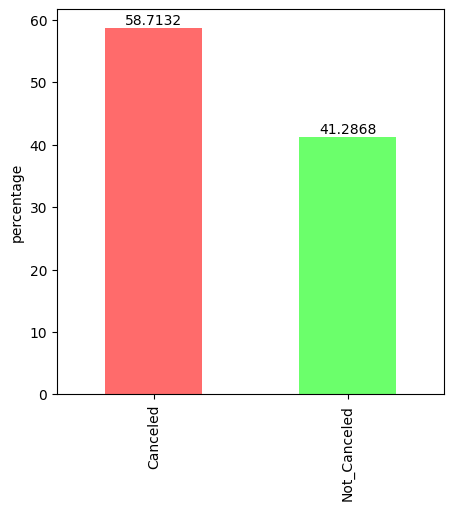

In [21]:
ax=lead_100=df[df['lead_time']>100]
ax=(lead_100['booking_status'].value_counts(normalize=True)*100).plot(kind='bar',
                                                                      figsize=(5,5),
                                                                      color=['#FF6B6B', '#6BFF6B'],
                                                                      ylabel='percentage')
for bars in ax.containers:
    ax.bar_label(bars)


The figure above demonstrates that if a customer books a hotel 100 days before their arrival, the chances of the cancellation rate exceeding 58% are significant, indicating a substantial increase.

Let's identify the impact on the cancellation rate when customers book hotels 200 days before their arrival.

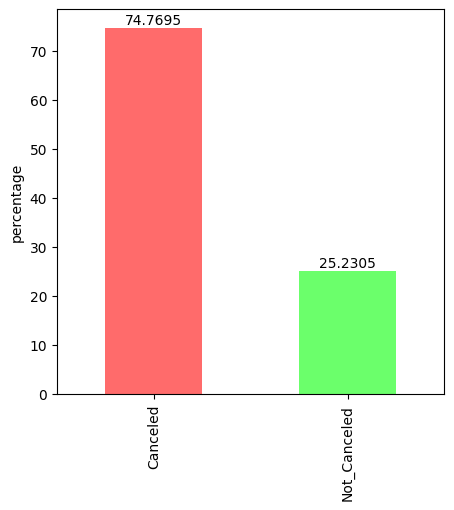

In [22]:
ax=lead_200=df[df['lead_time']>200]

ax=(lead_200['booking_status'].value_counts(normalize=True)*100).plot(kind='bar',
                                                                      figsize=(5,5),
                                                                      color=['#FF6B6B', '#6BFF6B'],
                                                                      ylabel='percentage')
for bars in ax.containers:
    ax.bar_label(bars)

We can see from the figure that if customers book the hotel 200 days before their arrival, the chances of the cancellation rate increasing go up to 70%, which is a significant increase.

# Are there any trends in booking patterns over time (e.g., seasonal variations, changes in market segments)?

In [27]:
market_book = df.groupby(['market_segment_type','arrival_month', 'arrival_year'])['Booking_ID'].count()
market_book = market_book.reset_index()
market_book

,market_segment_type,arrival_month,arrival_year,Booking_ID
0,Aviation,02,2018,1
1,Aviation,03,2018,3
2,Aviation,04,2018,25
3,Aviation,05,2018,29
4,Aviation,06,2018,6
...,...,...,...,...
76,Online,10,2018,2184
77,Online,11,2017,269
78,Online,11,2018,1619
79,Online,12,2017,441


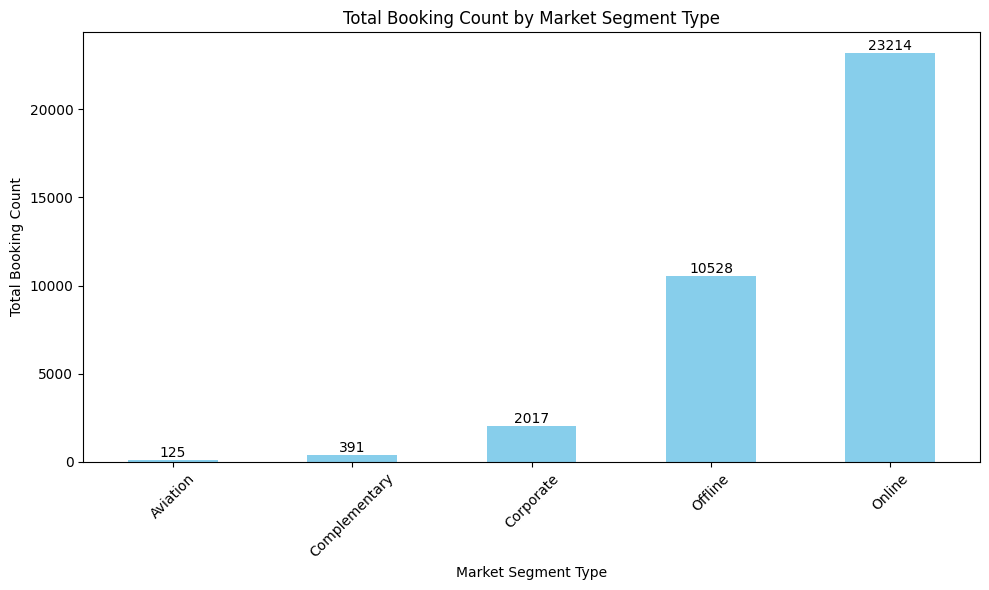

In [24]:
segment_sums = market_book.groupby('market_segment_type')['Booking_ID'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax=segment_sums.plot(kind='bar', color='skyblue')
plt.title('Total Booking Count by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Total Booking Count')
plt.xticks(rotation=45)
plt.tight_layout()

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


The above figure shows that the majority of customers arrive from the online market segment, with 23,214 arrivals. The offline market segment is the second most popular, with 10,528 arrivals. The corporate market segment is the least popular, with 2,017 arrivals.

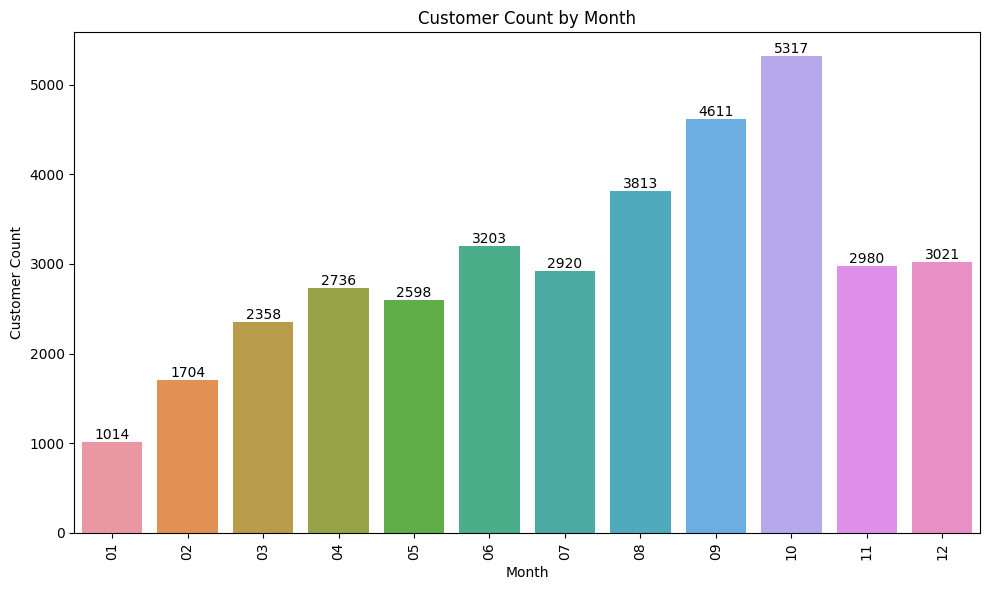

In [25]:
arrival_count=df.groupby('arrival_month')['Booking_ID'].count().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=arrival_count, x='arrival_month', y='Booking_ID')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')
 
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

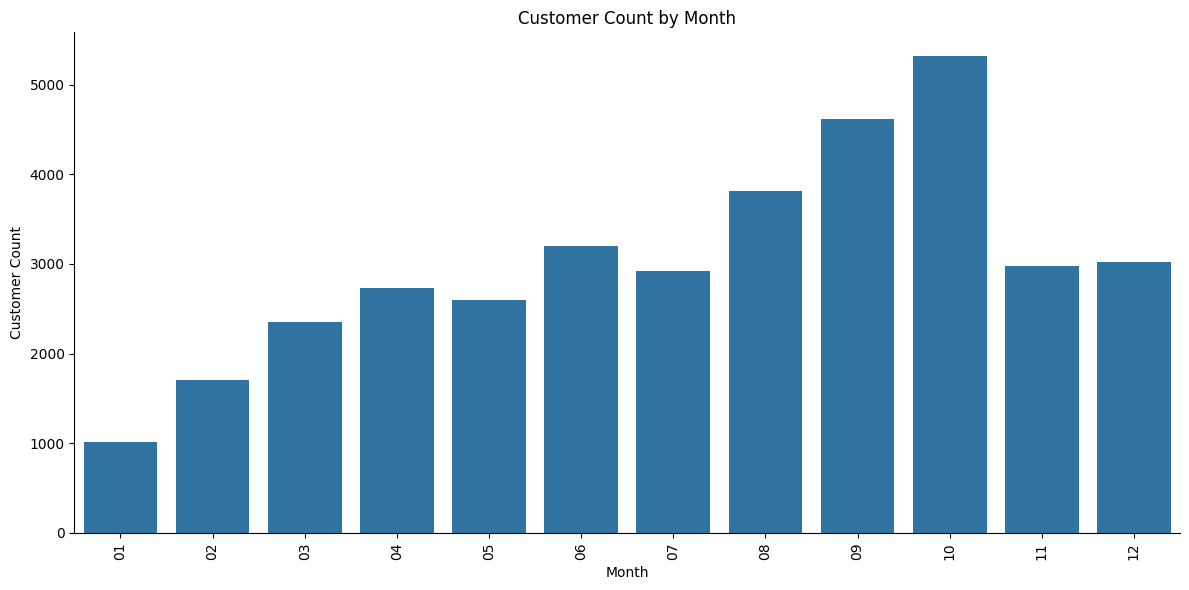

In [41]:

# Assuming 'df' is your DataFrame with appropriate data
arrival_count = df.groupby('arrival_month')['Booking_ID'].count().reset_index()

# Create the catplot
plt.figure(figsize=(10, 6))
sns.catplot(data=arrival_count, x='arrival_month', y='Booking_ID',
            kind='bar', height=6, aspect=2)

plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Customer Count')
plt.title('Customer Count by Month')

plt.tight_layout()
plt.show()


The figure shows that the customer count increased by 1 each month from month 1 to month 4. In month 5, there was a slight decrease, followed by an increase in month 6. There was another slight decrease in month 7, followed by 1-unit increases in months 8, 9, and 10. The customer count decreased in months 11 and 12, but the decrease was not as significant as the decrease in month 5.

Let's analyze the arrival count by month, segmented by market segment.

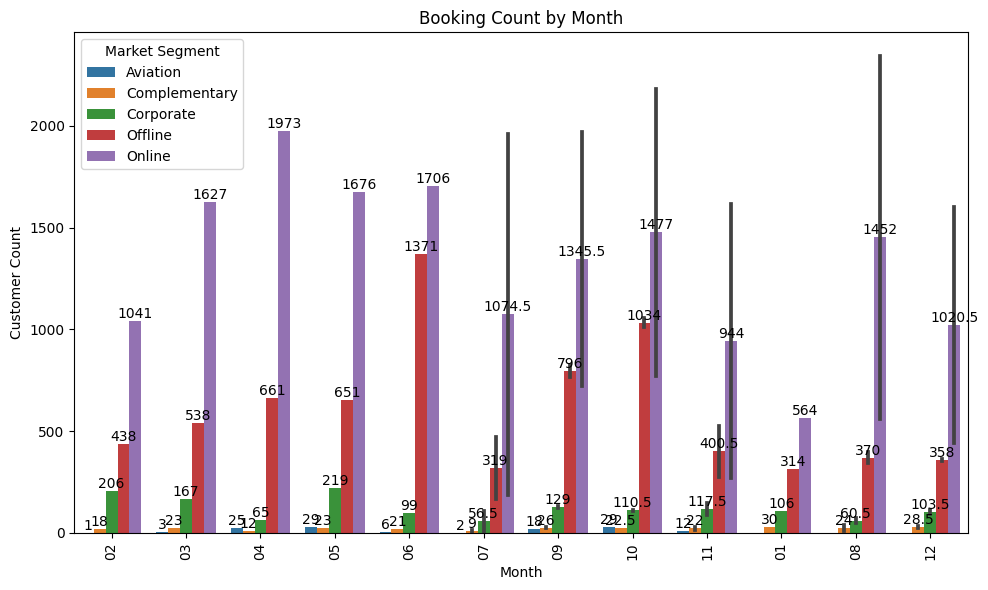

In [26]:
market_book = df.groupby(['market_segment_type', 'arrival_month','arrival_year'])['Booking_ID'].count().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=market_book, x='arrival_month', y='Booking_ID', hue='market_segment_type')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Customer Count')
plt.title('Booking Count by Month')
plt.legend(title='Market Segment')  

for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

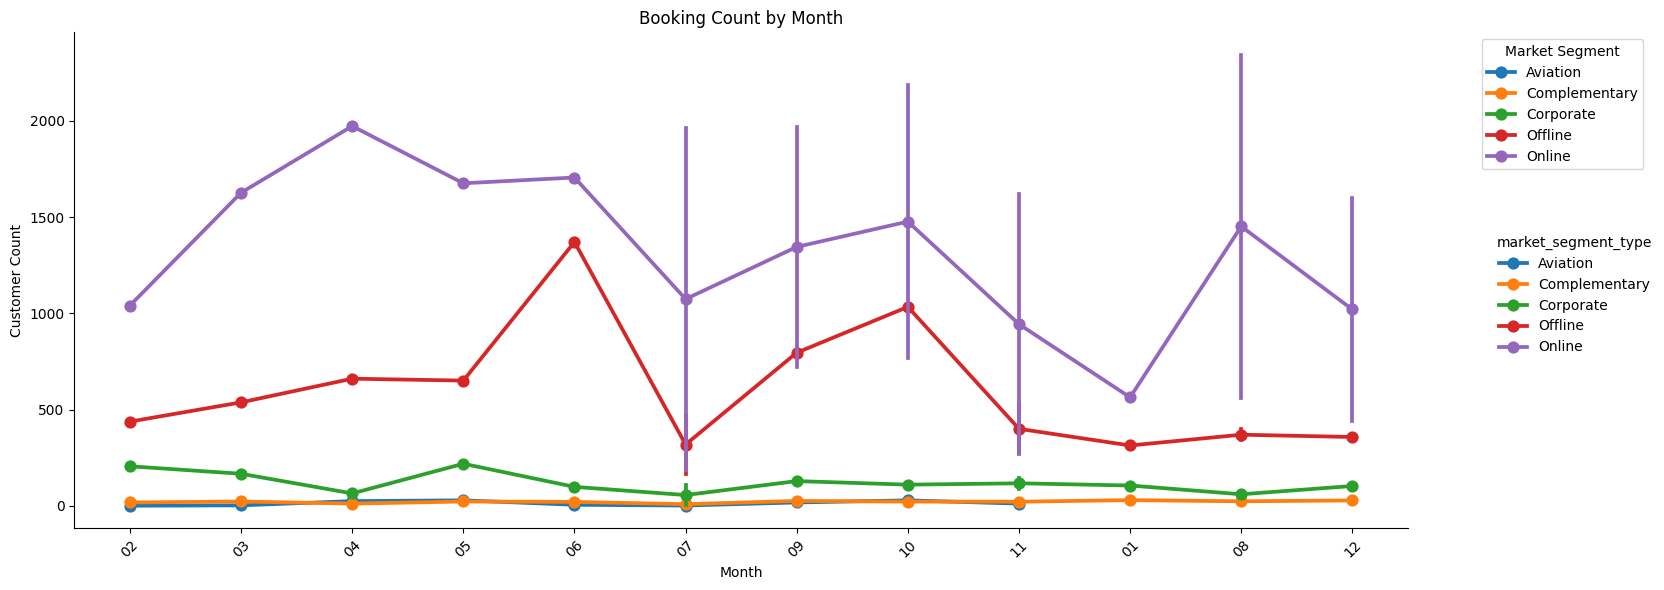

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with appropriate data
market_book = df.groupby(['market_segment_type', 'arrival_month', 'arrival_year'])['Booking_ID'].count().reset_index()

# Create the catplot
plt.figure(figsize=(12, 6))
sns.catplot(data=market_book, x='arrival_month', y='Booking_ID', hue='market_segment_type',
            kind='point', height=6, aspect=2.5, markers='o', linestyles='-')

plt.xlabel('Month')
plt.ylabel('Customer Count')
plt.title('Booking Count by Month')

plt.xticks(rotation=45)
plt.legend(title='Market Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The figure shows that the majority of bookings were made through the online market segment every month. The highest number of arrivals through the online market segment was in October, with 2,954 arrivals. The highest number of arrivals through the offline market segment was also in October, with 2,068 arrivals. The highest number of arrivals through the corporate segment was in September, with 258 arrivals.

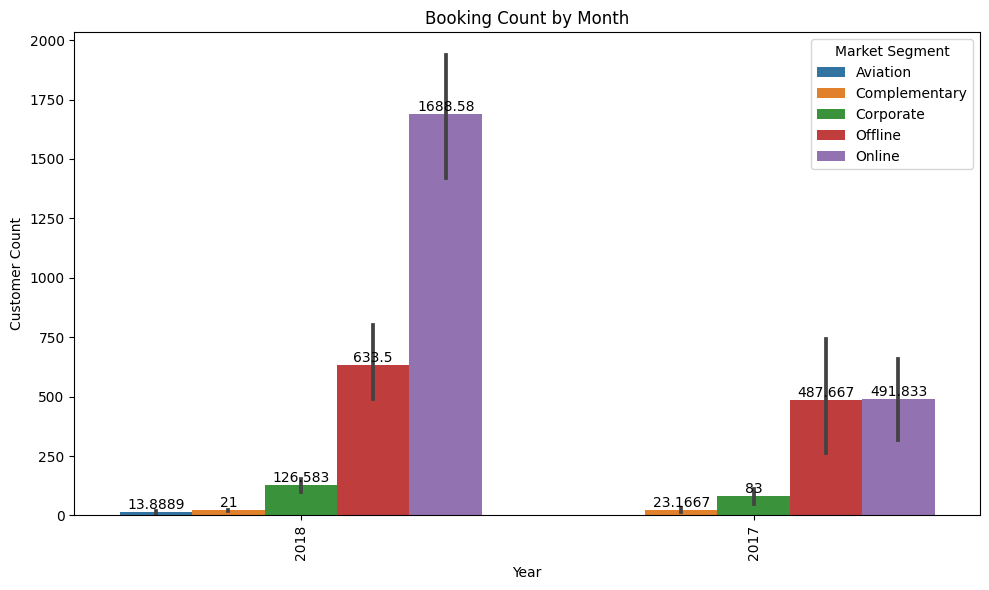

In [28]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=market_book, x='arrival_year', y='Booking_ID', hue='market_segment_type')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Customer Count')
plt.title('Booking Count by Month')
plt.legend(title='Market Segment') 

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

The customer count in 2018 was higher than the customer count in 2017 for most online market segments.

Total customer count by year, month, and arrival date

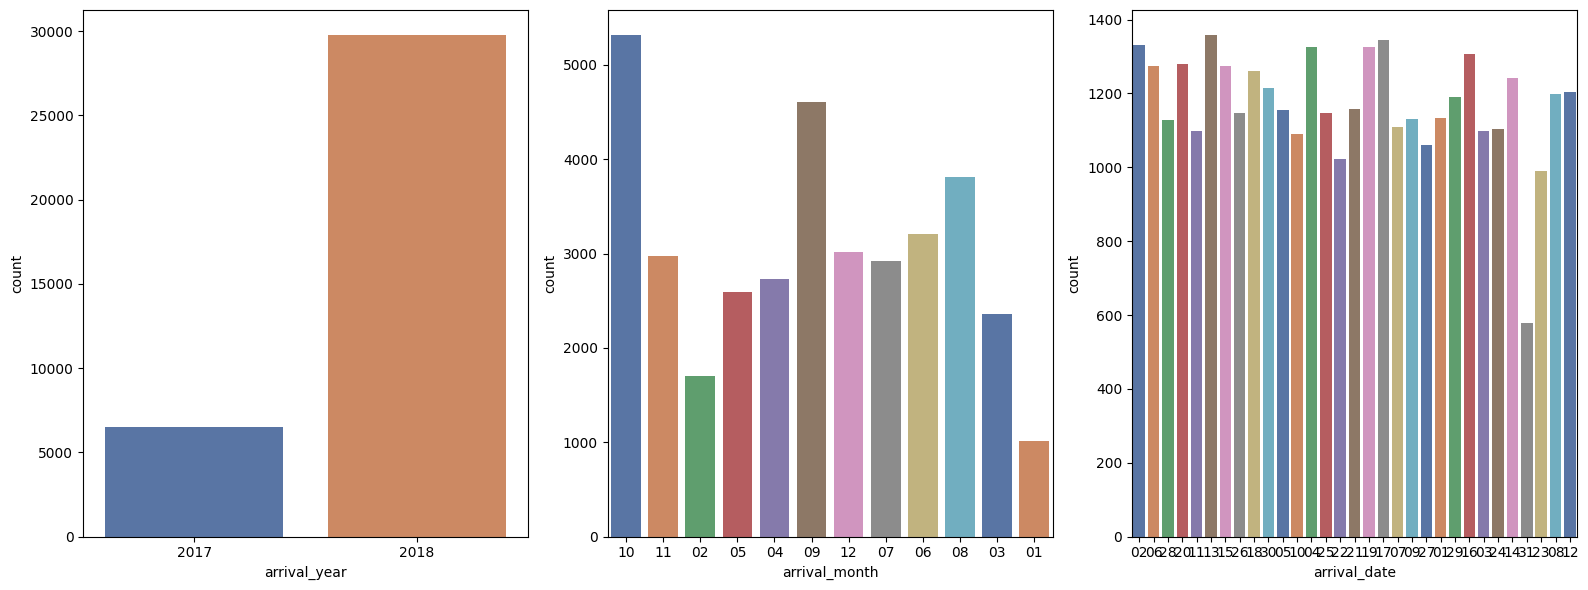

In [29]:
fig, ax = plt.subplots(1,3,figsize=(16,6))
sns.countplot(x=df['arrival_year'],ax=ax[0],palette='deep')

sns.countplot(x=df['arrival_month'],ax=ax[1],palette='deep')

sns.countplot(x=df['arrival_date'], ax=ax[2],palette='deep')

plt.tight_layout()
plt.show()

What are the most popular months for same-day hotel bookings?

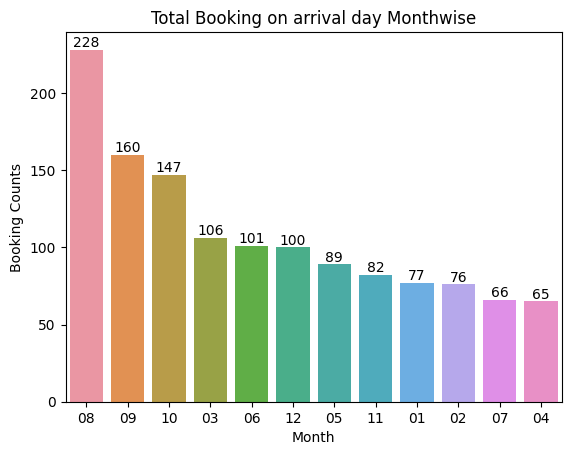

In [30]:
arrival_booking = df[df['lead_time'] < 1]

booking_counts = arrival_booking['arrival_month'].value_counts().reset_index()
booking_counts.columns = ['arrival_month', 'booking_counts']

ax = sns.barplot(data=booking_counts, x='arrival_month', y='booking_counts')
plt.xlabel('Month')
plt.ylabel('Booking Counts')
plt.title('Total Booking on arrival day Monthwise')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


The figure shows that October has the highest number of bookings with a lead time of less than 1 day, also known as same-day bookings.

let's analyze the October month booking status 

In [31]:
october_df = df[df['arrival_month'] == '08']

oct_avg = october_df['lead_time'].mean()

canceled_df = october_df[october_df['booking_status'] == 'Canceled']
not_canceled_df = october_df[october_df['booking_status'] == 'Not_Canceled']

avg_lead_time_canceled = canceled_df['lead_time'].mean()
avg_lead_time_not_canceled = not_canceled_df['lead_time'].mean()

market_x = canceled_df.groupby('market_segment_type')['booking_status'].count().reset_index()

print('Average lead time of October customers:',oct_avg)
print('Average lead time of customers who canceled the booking:',avg_lead_time_canceled)
print('Average lead time of customers who did not cancel the booking:',avg_lead_time_not_canceled)

market_x


Average lead time of October customers: 96.13139260424862
Average lead time of customers who canceled the booking: 143.25940860215053
Average lead time of customers who did not cancel the booking: 65.9694623655914


,market_segment_type,booking_status
0,Corporate,26
1,Offline,173
2,Online,1289


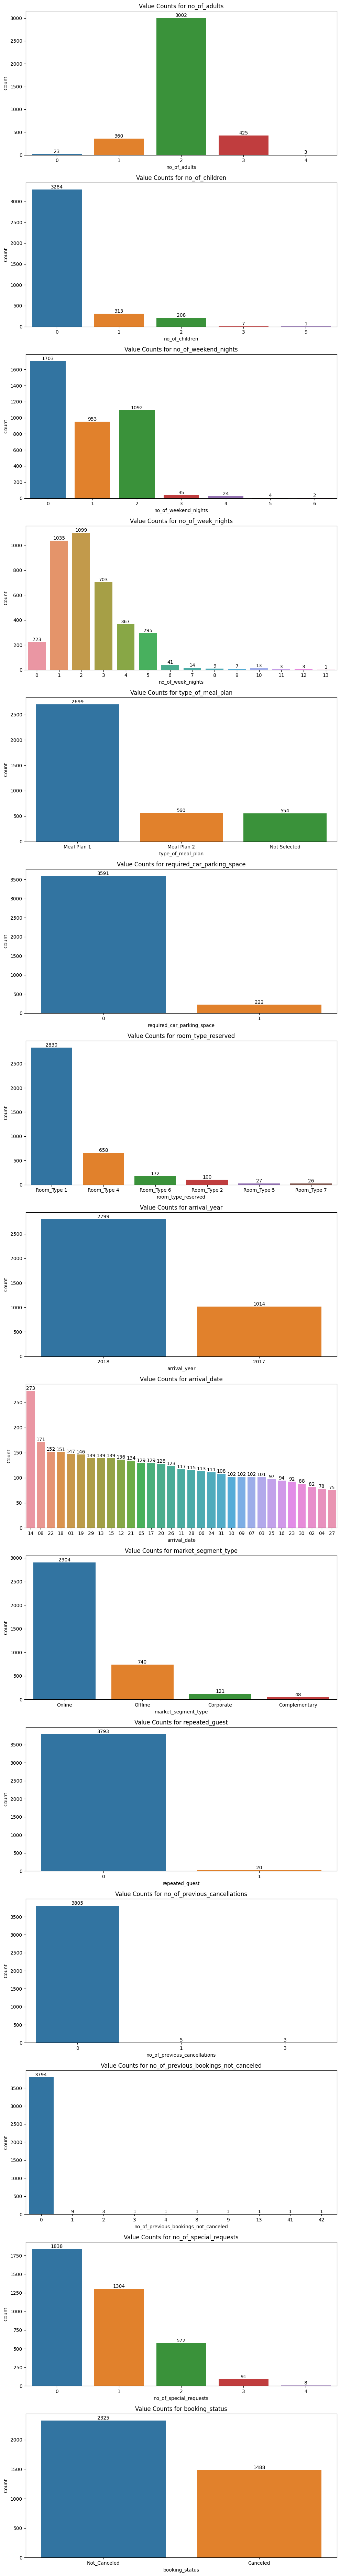

In [32]:


columns_to_count = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'type_of_meal_plan',
    'required_car_parking_space',
    'room_type_reserved',
    'arrival_year',
    'arrival_date',
    'market_segment_type',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_special_requests',
    'booking_status'
]




fig, axes = plt.subplots(nrows=len(columns_to_count), ncols=1, figsize=(10, 5 * len(columns_to_count)))

for i, column in enumerate(columns_to_count):
    ax = axes[i]

    value_counts = october_df[column].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)

    ax.set_title(f'Value Counts for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    for bar in ax.containers:
        ax.bar_label(bar)

plt.tight_layout()
plt.show()


In [33]:
oct_avg_price=october_df.groupby('room_type_reserved')['avg_price_per_room'].mean()
oct_avg_price=oct_avg_price.reset_index()
oct_avg_price

overall_avg_price=df.groupby('room_type_reserved')['avg_price_per_room'].mean()
overall_avg_price=overall_avg_price.reset_index()
overall_avg_price

,room_type_reserved,avg_price_per_room
0,Room_Type 1,95.918532
1,Room_Type 2,87.848555
2,Room_Type 3,73.678571
3,Room_Type 4,125.287317
4,Room_Type 5,123.733623
5,Room_Type 6,182.212836
6,Room_Type 7,155.198291


In [34]:
oct_avg_price

,room_type_reserved,avg_price_per_room
0,Room_Type 1,103.123396
1,Room_Type 2,89.786900
2,Room_Type 4,138.654802
3,Room_Type 5,113.273704
4,Room_Type 6,184.604128
5,Room_Type 7,183.989615


In [35]:
df['room_type_reserved'].value_counts()

avg_price_by_room_type=df.groupby('room_type_reserved')['avg_price_per_room'].mean()

total_revenue=df.groupby('arrival_month')['avg_price_per_room'].sum()
booking_counts_by_month=df['arrival_month'].value_counts()

cancellation_rate_by_room_type=df.groupby('room_type_reserved')['booking_status'].sum()




# What is the average revenue per reservation for a hotel?

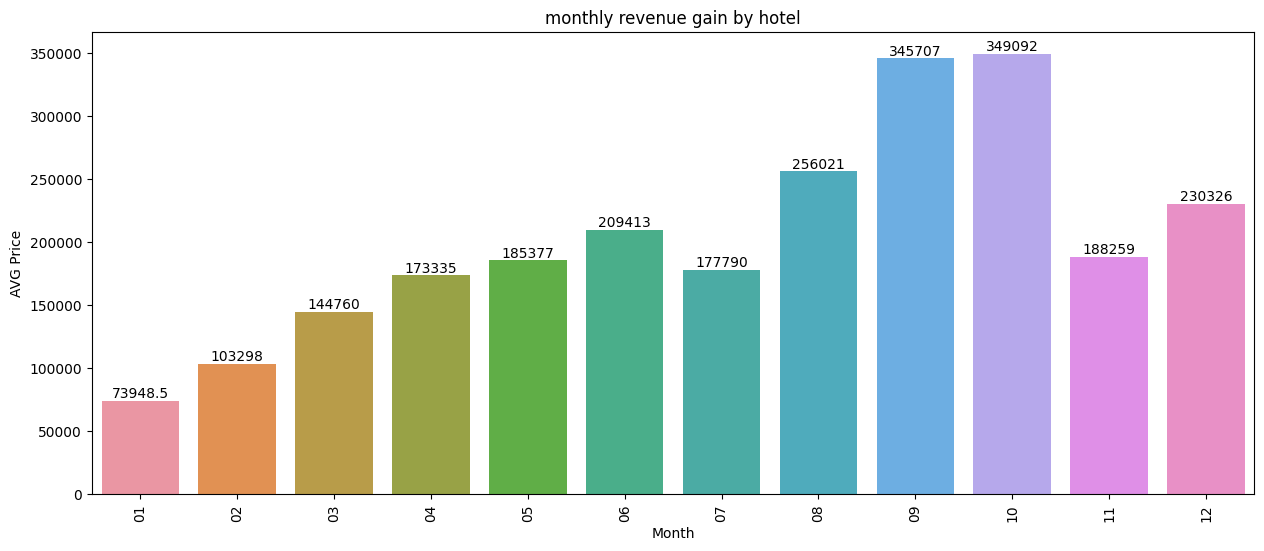

,arrival_month,avg_price_per_room
0,01,73948.46
1,02,103297.96
2,03,144760.27
3,04,173334.76
4,05,185377.37
5,06,209413.21
6,07,177789.87
7,08,256020.56
8,09,345707.46
9,10,349092.03


In [36]:
gain_revenue=df[df['booking_status']=='Not_Canceled']


monthly_revenue=gain_revenue.groupby('arrival_month')['avg_price_per_room'].sum()
monthly_revenue=monthly_revenue.reset_index()

plt.figure(figsize=(15,6))
ax=sns.barplot(data=gain_revenue,x=monthly_revenue['arrival_month'],y=monthly_revenue['avg_price_per_room'])
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('AVG Price')
plt.title('monthly revenue gain by hotel')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

monthly_revenue

C:\Users\harsh\AppData\Local\Temp\ipykernel_36320\2568659315.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




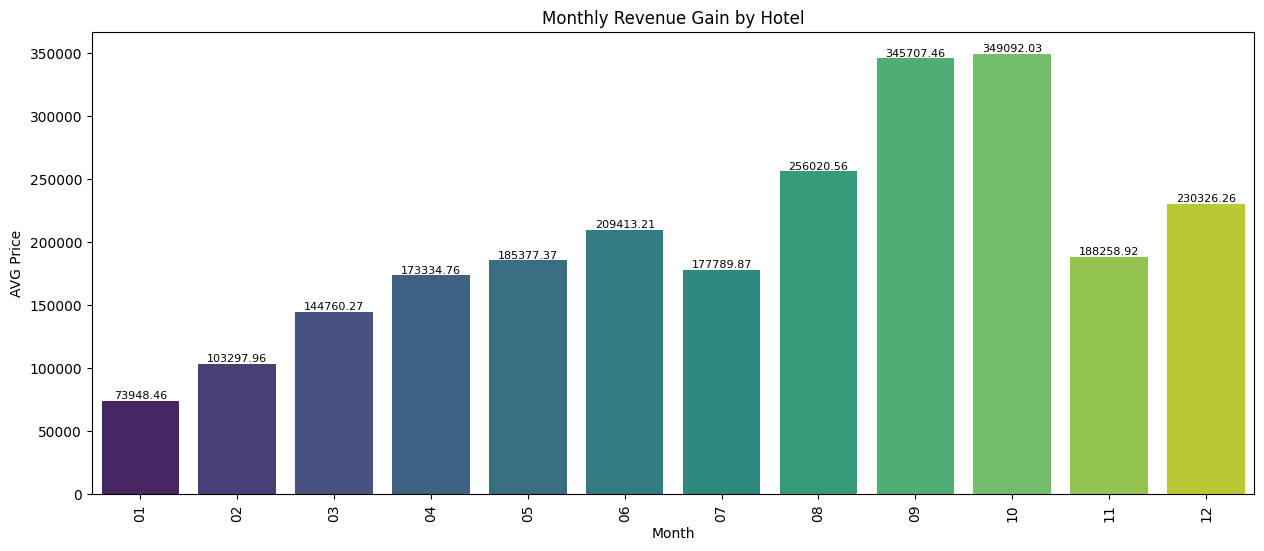

In [44]:

def filter_canceled_bookings(df):
    return df[df['booking_status'] == 'Not_Canceled']

def calculate_monthly_revenue(filtered_df):
    monthly_revenue = filtered_df.groupby('arrival_month')['avg_price_per_room'].sum()
    return monthly_revenue.reset_index()

def filter_canceled_bookings(df):
    return df[df['booking_status'] == 'Not_Canceled']

def calculate_monthly_revenue(filtered_df):
    monthly_revenue = filtered_df.groupby('arrival_month')['avg_price_per_room'].sum()
    return monthly_revenue.reset_index()

def plot_monthly_revenue(monthly_revenue):
    # Custom color palette for the bar plot
    custom_palette = sns.color_palette("viridis", n_colors=len(monthly_revenue))

    plt.figure(figsize=(15, 6))
    ax = sns.barplot(data=monthly_revenue, x='arrival_month', y='avg_price_per_room', palette=custom_palette)
    plt.xlabel('Month')
    plt.xticks(rotation=90)
    plt.ylabel('AVG Price')
    plt.title('Monthly Revenue Gain by Hotel')

    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=8, color='black')

    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
filtered_df = filter_canceled_bookings(df)
monthly_revenue_data = calculate_monthly_revenue(filtered_df)
plot_monthly_revenue(monthly_revenue_data)


We can see that the graph shows the highest revenue gains in September (345,707 euros) and October (349,092 euros) due to a lot of bookings and customer arrivals during these months.

# What is the average revenue loss due to booking cancellations?

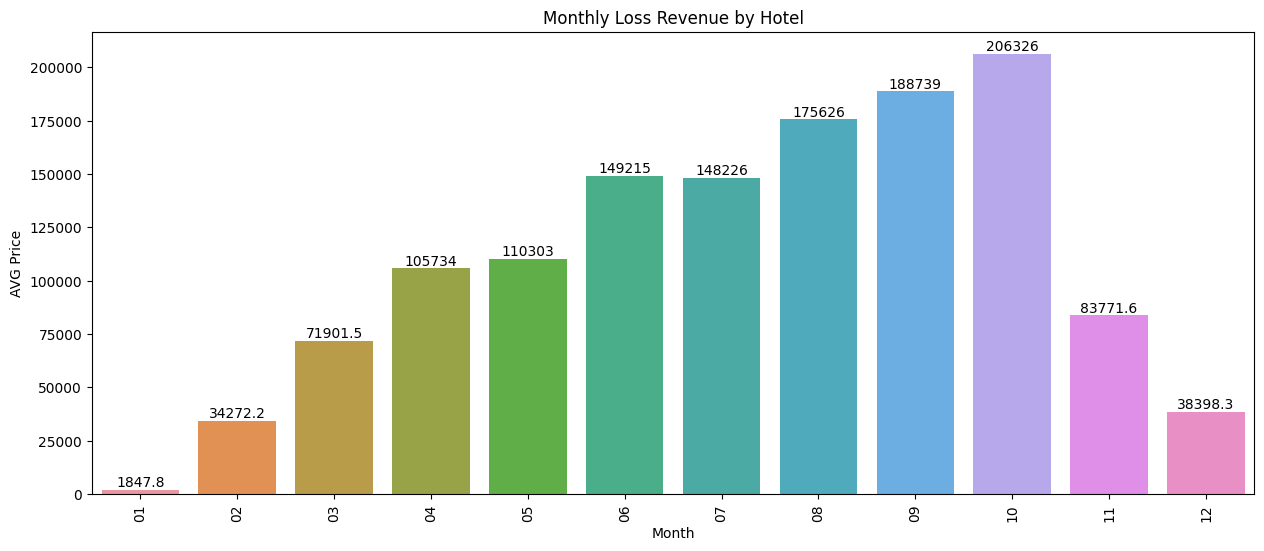

,arrival_month,avg_price_per_room
0,01,1847.80
1,02,34272.17
2,03,71901.49
3,04,105733.96
4,05,110302.77
5,06,149215.49
6,07,148226.14
7,08,175626.23
8,09,188739.33
9,10,206326.43


In [37]:

loss_revenue = df[df['booking_status'] == 'Canceled']

monthly_loss_revenue = loss_revenue.groupby('arrival_month')['avg_price_per_room'].sum()
monthly_loss_revenue = monthly_loss_revenue.reset_index()

plt.figure(figsize=(15, 6))
ax=sns.barplot(data=monthly_loss_revenue, x='arrival_month', y='avg_price_per_room')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('AVG Price')
plt.title('Monthly Loss Revenue by Hotel')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


monthly_loss_revenue


C:\Users\harsh\AppData\Local\Temp\ipykernel_36320\202197974.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




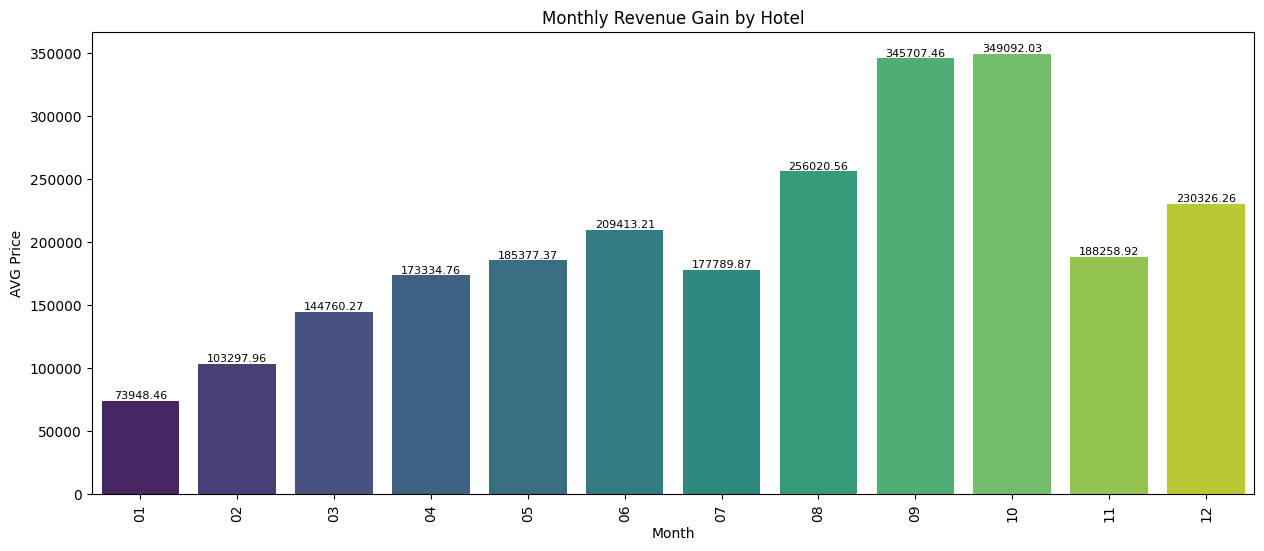

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def filter_canceled_bookings(df):
    return df[df['booking_status'] == 'Not_Canceled']

def calculate_monthly_revenue(filtered_df):
    monthly_revenue = filtered_df.groupby('arrival_month')['avg_price_per_room'].sum()
    return monthly_revenue.reset_index()

def plot_monthly_revenue(monthly_revenue, use_custom_palette=True):
    # Use a custom color palette if specified, otherwise use the default palette
    if use_custom_palette:
        custom_palette = sns.color_palette("viridis", n_colors=len(monthly_revenue))
    else:
        custom_palette = None

    plt.figure(figsize=(15, 6))
    ax = sns.barplot(data=monthly_revenue, x='arrival_month', y='avg_price_per_room', palette=custom_palette)
    plt.xlabel('Month')
    plt.xticks(rotation=90)
    plt.ylabel('AVG Price')
    plt.title('Monthly Revenue Gain by Hotel')

    for bars in ax.containers:
        ax.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=8, color='black')

    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
filtered_df = filter_canceled_bookings(df)
monthly_revenue_data = calculate_monthly_revenue(filtered_df)

# Conditionally use a custom color palette based on a concrete condition
use_custom_palette = len(monthly_revenue_data) > 0  # Replace with your actual condition

plot_monthly_revenue(monthly_revenue_data, use_custom_palette)


The above graph shows that average revenue losses in September (188,739 euros) and October (206,326 euros) were highest during the months with the most arrivals and cancellations.

In [38]:
total_revenue

arrival_month
01     75796.26
02    137570.13
03    216661.76
04    279068.72
05    295680.14
06    358628.70
07    326016.01
08    431646.79
09    534446.79
10    555418.46
11    272030.57
12    268724.55
Name: avg_price_per_room, dtype: float64

# Which month do we lose the most revenue compared to the revenue we gain?

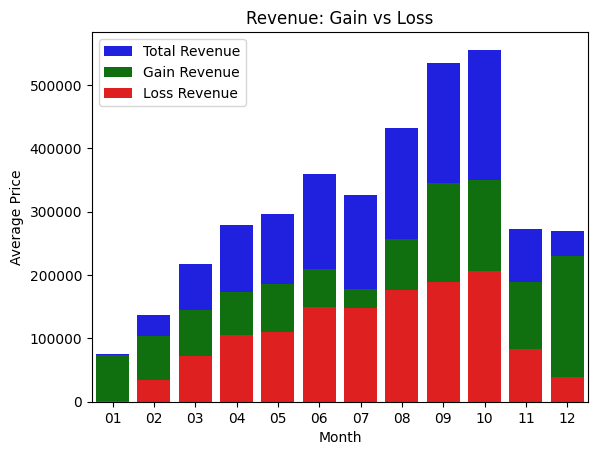

In [39]:
revenue_data = pd.merge(total_revenue, monthly_revenue, on='arrival_month', suffixes=('_total', '_gain',))
revenue_data = pd.merge(revenue_data, monthly_loss_revenue, on='arrival_month')

sns.barplot(data=revenue_data, x='arrival_month', y='avg_price_per_room_total', color='blue', label='Total Revenue')
sns.barplot(data=revenue_data, x='arrival_month', y='avg_price_per_room_gain', color='green', label='Gain Revenue')
sns.barplot(data=revenue_data, x='arrival_month', y='avg_price_per_room', color='red', label='Loss Revenue')

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Revenue: Gain vs Loss')
plt.legend()
plt.show()


The above figure shows that December has more revenue than lost revenue, with most losses occurring in October compared to gains.

# Analyze the average lead time of booking cancellations and non-cancellations in the month of December ?

Booking AVG lead time: market_segment_type
Complementary    19.473684
Corporate        18.961353
Offline          95.240223
Online           75.857913
Name: lead_time, dtype: float64
Booking AVG lead time Not Canceled: market_segment_type
Complementary    19.473684
Corporate        18.961353
Offline          95.229371
Online           54.094512
Name: lead_time, dtype: float64
Booking AVG lead time Canceled: market_segment_type
Offline    103.000000
Online     164.865337
Name: lead_time, dtype: float64


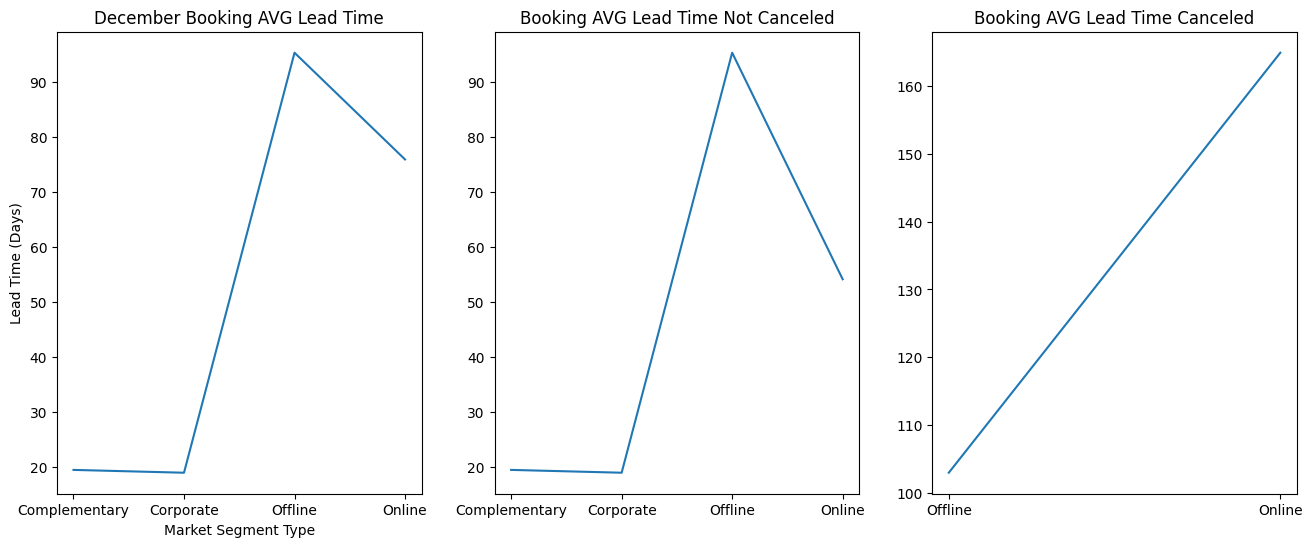

In [43]:
booking_canceled = df[(df['arrival_month'] == '12') & (df['booking_status'] == 'Canceled')]
booking_not_canceled = df[(df['arrival_month'] == 12) & (df['booking_status'] == 'Not_Canceled')]

booking = df[df['arrival_month'] == '12']
booking = booking.reset_index()
booking_canceled = df[(df['arrival_month'] == '12') & (df['booking_status'] == 'Canceled')]
booking_not_canceled = df[(df['arrival_month'] == '12') & (df['booking_status'] == 'Not_Canceled')]

lead_time = booking.groupby('market_segment_type')['lead_time'].mean()
lead_time1 = booking_not_canceled.groupby('market_segment_type')['lead_time'].mean()
lead_time2 = booking_canceled.groupby('market_segment_type')['lead_time'].mean()

print(f'Booking AVG lead time: {lead_time}')
print(f'Booking AVG lead time Not Canceled: {lead_time1}')
print(f'Booking AVG lead time Canceled: {lead_time2}')


fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(lead_time.index, lead_time.values, label='All Bookings')
axes[1].plot(lead_time1.index, lead_time1.values, label='Not Canceled')
axes[2].plot(lead_time2.index, lead_time2.values, label='Canceled')

axes[0].set_title('December Booking AVG Lead Time')
axes[0].set_xlabel('Market Segment Type')
axes[0].set_ylabel('Lead Time (Days)')
axes[1].set_title('Booking AVG Lead Time Not Canceled')
axes[2].set_title('Booking AVG Lead Time Canceled')

# Show the plot
plt.show()



We can see that the cancellation rate of hotel rooms increases if the ticket is booked through the online or offline segment with a lead time of greater than or equal to 100 days.

# How do the number of adults, children, and special requests influence the type of room and meal plan selected by customers?

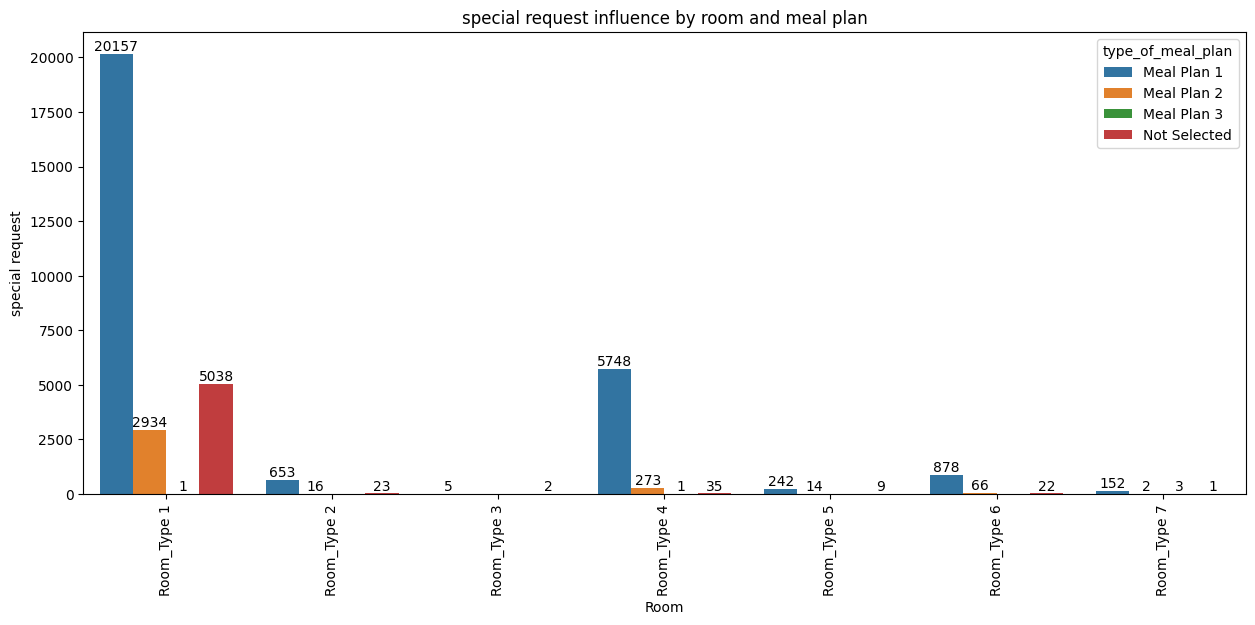

In [45]:
spec_r_m=df.groupby(['room_type_reserved','type_of_meal_plan'])['no_of_special_requests'].count()

spec_r_m=spec_r_m.reset_index()

plt.figure(figsize=(15,6))
ax=sns.barplot(data=spec_r_m,x='room_type_reserved',y='no_of_special_requests',hue='type_of_meal_plan')
plt.xlabel('Room')
plt.xticks(rotation=90)
plt.ylabel('special request')
plt.title('special request influence by room and meal plan')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

The above figure shows that most customer special requests are for room type 1 and meal plan 1. Let's focus on customers who have given special requests one time.

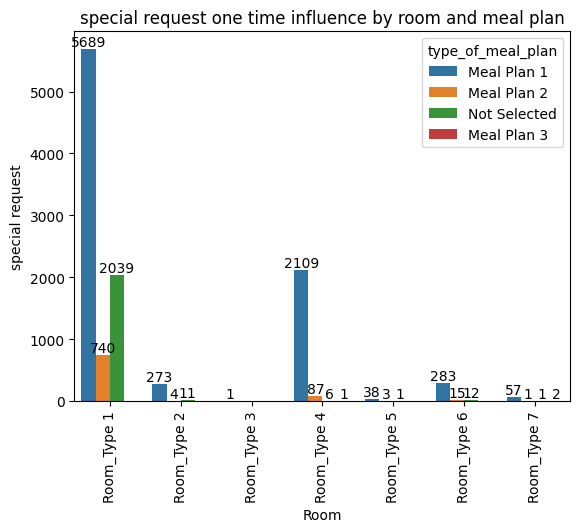

In [46]:
special_r_m1=df[df['no_of_special_requests']==1]
special_r_m1=special_r_m1.groupby(['room_type_reserved','type_of_meal_plan'])['no_of_special_requests'].count()

special_r_m1=special_r_m1.reset_index()

ax=sns.barplot(data=special_r_m1,x='room_type_reserved',y='no_of_special_requests',hue='type_of_meal_plan')
plt.xlabel('Room')
plt.xticks(rotation=90)
plt.ylabel('special request')
plt.title('special request one time influence by room and meal plan')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


The figure shows that customers who give one-time special requests prefer room type 1 most, followed by room type 4, and meal plan 1.

Now let's check how two-time special requests influence room type and meal plan.

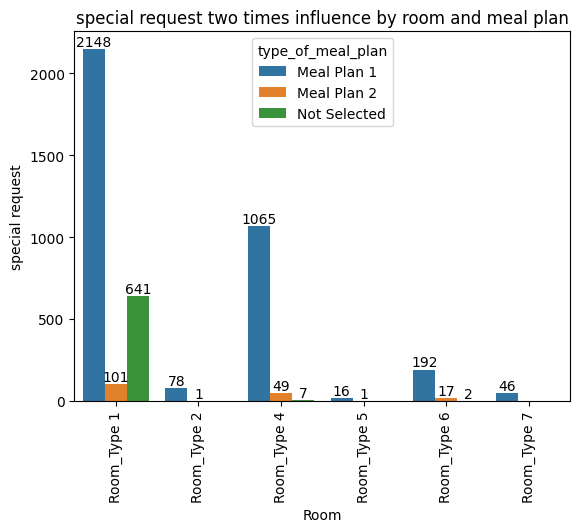

In [47]:
special_r_m2=df[df['no_of_special_requests']==2]
special_r_m2=special_r_m2.groupby(['room_type_reserved','type_of_meal_plan'])['no_of_special_requests'].count()

special_r_m2=special_r_m2.reset_index()

ax=sns.barplot(data=special_r_m2,x='room_type_reserved',y='no_of_special_requests',hue='type_of_meal_plan')
plt.xlabel('Room')
plt.xticks(rotation=90)
plt.ylabel('special request')
plt.title('special request two times influence by room and meal plan')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


The figure shows that customers who make special requests twice most prefer room types 1 and 4 and meal plan 1.

Let's see the three time special request influnce the room type and meal plan

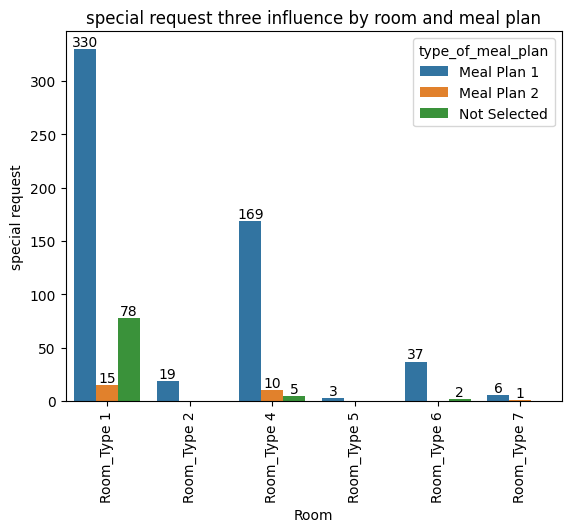

In [48]:
special_r_m3=df[df['no_of_special_requests']==3]
special_r_m3=special_r_m3.groupby(['room_type_reserved','type_of_meal_plan'])['no_of_special_requests'].count()

special_r_m3=special_r_m3.reset_index()

ax=sns.barplot(data=special_r_m3,x='room_type_reserved',y='no_of_special_requests',hue='type_of_meal_plan')
plt.xlabel('Room')
plt.xticks(rotation=90)
plt.ylabel('special request')
plt.title('special request three influence by room and meal plan')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()



The figure shows that customers who make special requests thrice most prefer room types 1 and 4 and meal plan 1.

Let's see the special request four times influence by room and meal plan.

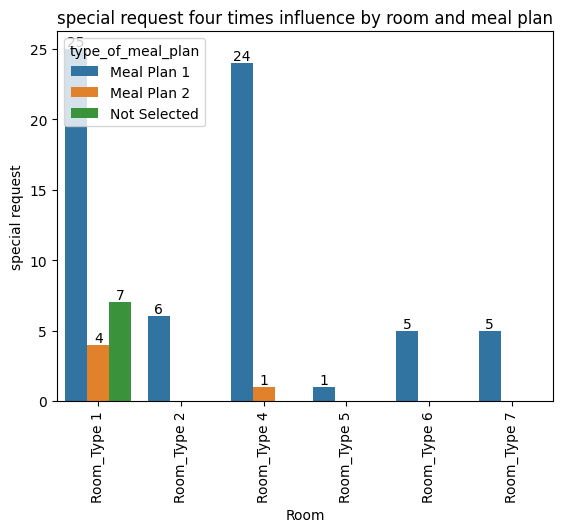

In [49]:
special_r_m4=df[df['no_of_special_requests']==4]
special_r_m4=special_r_m4.groupby(['room_type_reserved','type_of_meal_plan'])['no_of_special_requests'].count()

special_r_m4=special_r_m4.reset_index()

ax=sns.barplot(data=special_r_m4,x='room_type_reserved',y='no_of_special_requests',hue='type_of_meal_plan')
plt.xlabel('Room')
plt.xticks(rotation=90)
plt.ylabel('special request')
plt.title('special request four times influence by room and meal plan')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

The figure shows that customers who make special requests four times most prefer room types 1 and 4 and meal plan 1.

Now let's see five special request five times influences the room type and meal plan

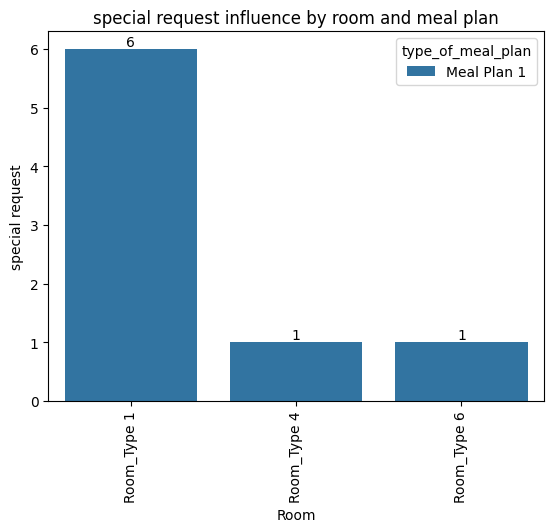

In [50]:
special_r_m5=df[df['no_of_special_requests']==5]
special_r_m5=special_r_m5.groupby(['room_type_reserved','type_of_meal_plan'])['no_of_special_requests'].count()

special_r_m5=special_r_m5.reset_index()

ax=sns.barplot(data=special_r_m5,x='room_type_reserved',y='no_of_special_requests',hue='type_of_meal_plan')
plt.xlabel('Room')
plt.xticks(rotation=90)
plt.ylabel('special request')
plt.title('special request influence by room and meal plan')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

The figure shows that customers who make special requests five times only prefer room types 1 and meal plan 1.

All of the figures show that special requests most often influence customers to choose room types 1 and 2 with meal plan 1.

# What are the most popular days of the week and for hotel bookings?

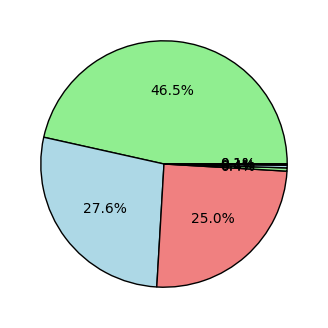

Sunday       46.512654
Monday       27.554171
Tuesday      25.006892
Wednesday     0.421790
Thursday      0.355627
Friday        0.093731
Saturday      0.055136
Name: no_of_weekend_nights, dtype: float64

In [51]:
df = df[df['no_of_weekend_nights'] != 7]
df['no_of_weekend_nights'] = df['no_of_weekend_nights'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',  
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

# Calculate the value counts and normalize them to get percentages
value_counts = df['no_of_weekend_nights'].value_counts(normalize=True) * 100

# Create a pie chart
ax = value_counts.plot(kind='pie',
                       figsize=(6, 4),
                       colors=['lightgreen', 'lightblue', 'lightcoral'],  # Specify colors
                       labels=None,  # Hide labels on the pie chart
                       autopct='%1.1f%%',  # Format the percentages
                       wedgeprops={'edgecolor': 'black'})  # Add black edges to slices

# Add labels outside the pie chart with percentages
ax.set_ylabel('') # Remove the default ylabel

# Show the plot
plt.show()
value_counts

the above figure shows Most popular week days

Sunday: 46.5%,
Monday: 27%,
Tuesday: 25%

Other weekdays have very low popularity.

# How do prices vary depending on the time of year, day of the week, and lead time?

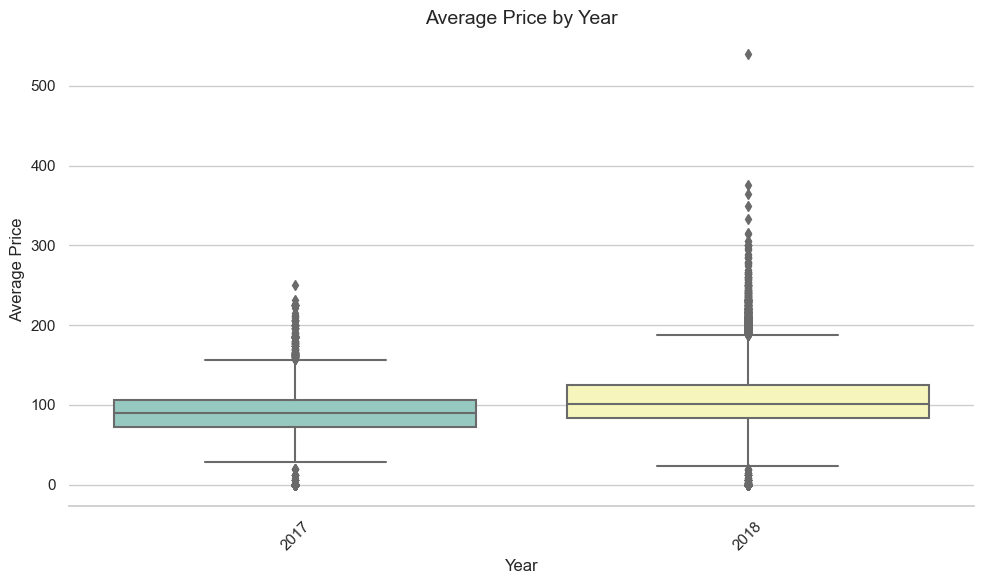

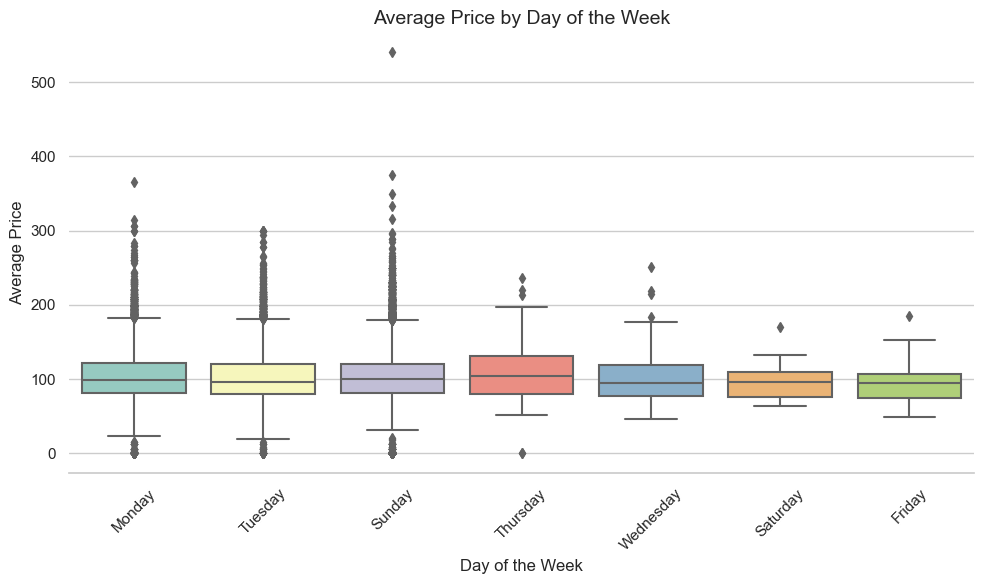

In [54]:
def styled_box_plot(data, x_col, y_col, x_label, y_label, title):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")  # Apply a white grid background
    sns.boxplot(x=x_col, y=y_col, data=df, palette="Set3")  # Use a different color palette
    plt.xlabel(x_label, fontsize=12)  # Customize x-axis label font size
    plt.ylabel(y_label, fontsize=12)  # Customize y-axis label font size
    plt.title(title, fontsize=14)  # Customize title font size
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    sns.despine(left=True)  # Remove the left spine for a cleaner look
    plt.tight_layout()  # Ensure tight layout
    plt.show()

# Time of Year Analysis
styled_box_plot(df.groupby('arrival_year')['avg_price_per_room'].mean(),
                'arrival_year', 'avg_price_per_room',
                'Year', 'Average Price',
                'Average Price by Year')

# Day of the Week Analysis
styled_box_plot(df.groupby('no_of_weekend_nights')['avg_price_per_room'].mean(),
                'no_of_weekend_nights', 'avg_price_per_room',
                'Day of the Week', 'Average Price',
                'Average Price by Day of the Week')



The above figures indicate that in the year 2018, there is a slightly higher average price compared to the year 2017. Additionally, it appears that Thursday has a slightly higher average price than the other weekdays

Room type and the number of customers are factors of average price. So, we can create a group for every room type in this data and create dataframes to check the impact of lead time on average price.

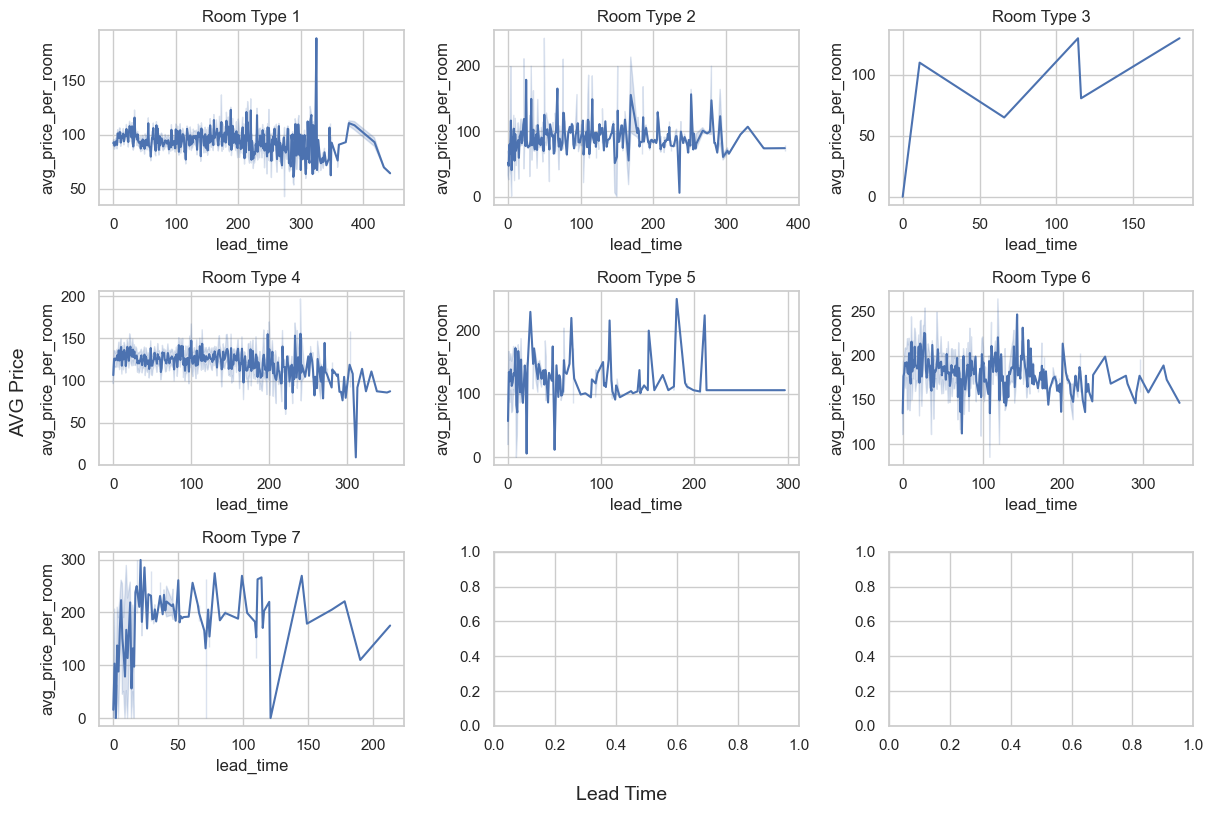

In [55]:

room1_price = df[df['room_type_reserved'] == 'Room_Type 1'].reset_index()
room2_price = df[df['room_type_reserved'] == 'Room_Type 2'].reset_index()
room3_price = df[df['room_type_reserved'] == 'Room_Type 3'].reset_index()
room4_price = df[df['room_type_reserved'] == 'Room_Type 4'].reset_index()
room5_price = df[df['room_type_reserved'] == 'Room_Type 5'].reset_index()
room6_price = df[df['room_type_reserved'] == 'Room_Type 6'].reset_index()
room7_price = df[df['room_type_reserved'] == 'Room_Type 7'].reset_index()

# Create a subplot grid
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Iterate over the axes and create a line plot for each room type
for i, (ax, room_price) in enumerate(zip(axes.flatten(), [room1_price, room2_price, room3_price, room4_price, room5_price, room6_price, room7_price])):
    sns.lineplot(data=room_price, x='lead_time', y='avg_price_per_room', ax=ax)

    # Set the title of the subplot
    ax.set_title(f'Room Type {i + 1}')

# Add a common x and y label for all subplots
fig.text(0.5, -0.01, 'Lead Time', ha='center', fontsize=14)
fig.text(-0.01, 0.5, 'AVG Price', va='center', rotation='vertical', fontsize=14)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()


The above figure shows that lead time does not make that much of an impact on average price.

# What is the impact of being a repeated guest on booking behavior and cancellation rates?

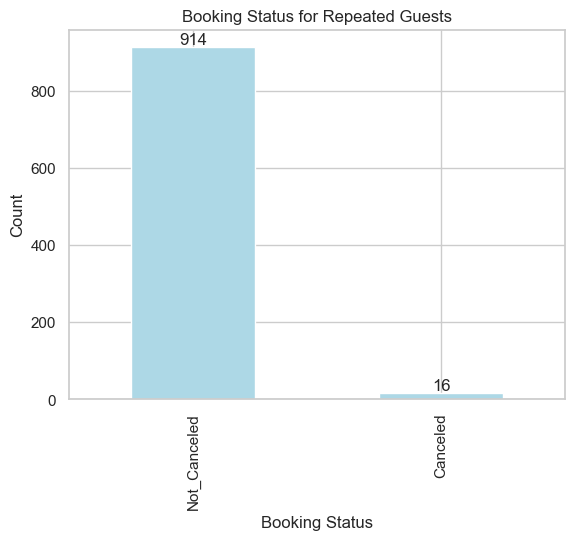

In [56]:
repeated_impact = df[df['repeated_guest'] == 1]

repeated_impact = repeated_impact.reset_index()

booking_status_counts = repeated_impact['booking_status'].value_counts()
ax = booking_status_counts.plot(kind='bar', color='lightblue')

ax.set_xlabel('Booking Status')
ax.set_ylabel('Count')
ax.set_title('Booking Status for Repeated Guests')

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()


The figure shows that there is no significant impact on booking behavior, especially in terms of cancellations. In fact, only 16 repeat guests canceled their bookings out of a total of 930

Now, let's check which market segment the cancellations are coming from among those who canceled their bookings.


In [57]:

repeated_canceled = df[(df['repeated_guest'] == 1) & (df['booking_status'] == 'Canceled')]
repeated_canceled=repeated_canceled.reset_index()
repeated_canceled_market=repeated_canceled.groupby(['market_segment_type','repeated_guest'])['booking_status'].count()
repeated_canceled_market=repeated_canceled_market.reset_index()
repeated_canceled_market

,market_segment_type,repeated_guest,booking_status
0,Corporate,1,3
1,Offline,1,6
2,Online,1,7


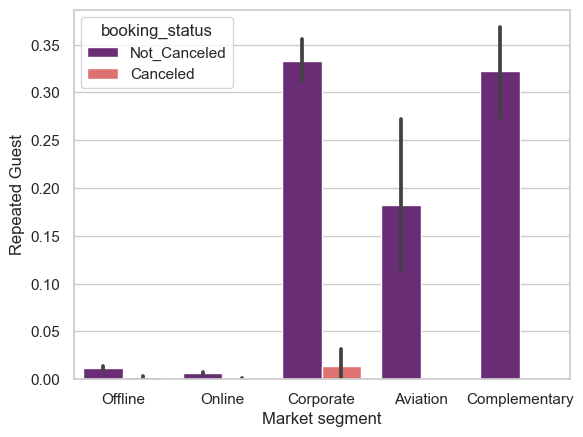

In [58]:
sns.barplot(data=df,x='market_segment_type',y='repeated_guest',hue='booking_status',palette='magma')
plt.xlabel('Market segment')
plt.ylabel('Repeated Guest')
plt.show()

# How does the availability of car parking space affect the booking ?

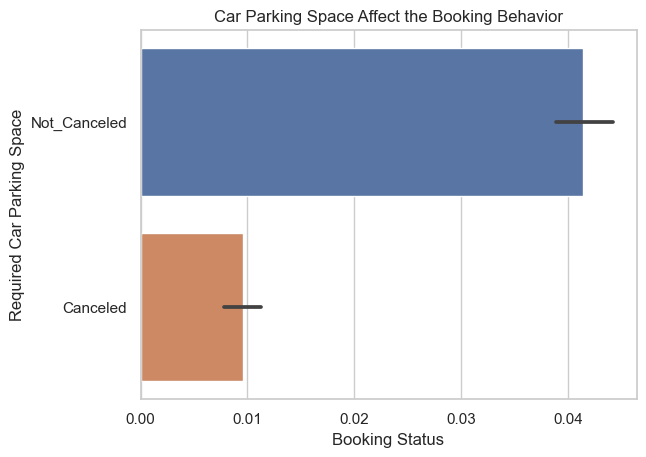

Not_Canceled    1010
Canceled         114
Name: booking_status, dtype: int64

In [59]:
park=df[df['required_car_parking_space']==1]
park=park.reset_index()

park_book=park['booking_status'].value_counts()

df['car_parking_status'] = df['required_car_parking_space'].apply(lambda x: 1 if x > 0 else 0)

ax = sns.barplot(
    data=df,
    x='car_parking_status',
    y='booking_status'
)

plt.xlabel('Booking Status')
plt.ylabel('Required Car Parking Space')
plt.title('Car Parking Space Affect the Booking Behavior')

for bars in ax.containers:
    ax.bar_label(bar)
plt.show()

park_book

We can see that there is not much impact on booking behavior. Only 114 customers have canceled their bookings

# Conclusion:


* Room types 1 and 4 are the most popular, while room type 3 is the least popular.
* Lead time has an impact on cancellation rate, with longer lead times associated with higher cancellation rates.
* Customers who book hotels 100 days or more in advance have a high probability of canceling (over 58%).
* The majority of bookings and customer arrivals come from the online market segment.
* October is the busiest month for the hotel, with the most bookings, customer arrivals, and revenue.
* Most customer special requests are for room type 1 and meal plan 1.
* Customers who give one-time special requests prefer room type 1 most, followed by room type 4, and meal plan 1.
* Customers who make special requests four times or more only prefer room types 1 and meal plan 1.
* Sunday is the most popular week day for bookings, followed by Monday and Tuesday.
* The average price in 2018 is slightly higher than in 2017, and Thursday has the slightly highest average price of the   weekdays.
* Lead time does not make a significant impact on average price.
* There is no significant impact on booking behavior, especially in terms of cancellations, even for repeat guests and customers who require car parking space.

These insights can be used by the hotel to improve its operations and customer satisfaction. For example, the hotel can focus on marketing and selling its most popular room types and meal plans. The hotel can also develop strategies to reduce the number of cancellations, such as offering discounts or incentives to guests who book in advance or who are more likely to cancel. The hotel can also use the insights to improve its pricing strategy and to ensure that it is offering competitive rates.